In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from chapters.chapter7 import ECDF

In [2]:
df = pd.read_csv('../data/fijiquakes.csv', sep='\t')
df = df.rename(columns={c: c.lower().strip('.') for c in df})
df.head()

,obs,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


In [3]:
df.describe()

,obs,lat,long,depth,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,-20.642750,179.462020,311.371000,4.620400,33.418000
std,288.819436,5.028791,6.069497,215.535498,0.402773,21.900386
min,1.000000,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,250.750000,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,500.500000,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,750.250000,-17.637500,183.200000,543.000000,4.900000,42.000000
max,1000.000000,-10.720000,188.130000,680.000000,6.400000,132.000000


In [4]:
F = ECDF(df.mag)
F(6)

0.998

In [5]:
F.ci(5)

CI(lower=0.8060530591653262, upper=0.8919469408346737)

In [6]:
df['ecdf'] = df.mag.apply(F)
df['ci'] = df.mag.apply(F.ci)
df['l'] = df.ci.apply(lambda x: x.lower)
df['u'] = df.ci.apply(lambda x: x.upper)
df.sort_values('mag').head()

,obs,lat,long,depth,mag,stations,ecdf,ci,l,u
769,770,-20.70,186.30,80,4.0,10,0.046,"(0.0030530591653262426, 0.08894694083467375)",0.003053,0.088947
726,727,-17.10,182.80,390,4.0,14,0.046,"(0.0030530591653262426, 0.08894694083467375)",0.003053,0.088947
636,637,-19.51,183.97,280,4.0,16,0.046,"(0.0030530591653262426, 0.08894694083467375)",0.003053,0.088947
815,816,-22.12,180.49,532,4.0,14,0.046,"(0.0030530591653262426, 0.08894694083467375)",0.003053,0.088947
112,113,-19.06,182.45,477,4.0,16,0.046,"(0.0030530591653262426, 0.08894694083467375)",0.003053,0.088947


In [7]:
dft = pd.melt(df, id_vars='mag', value_vars=['ecdf', 'l', 'u'])
dft.head()

,mag,variable,value
0,4.8,ecdf,0.748
1,4.2,ecdf,0.191
2,5.4,ecdf,0.962
3,4.1,ecdf,0.101
4,4.0,ecdf,0.046


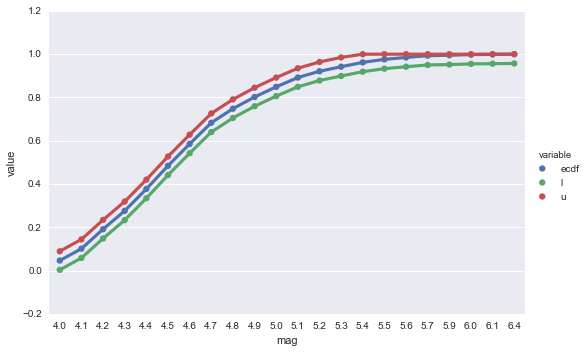

In [8]:
g = sns.factorplot(x='mag', y='value', data=dft, 
               hue='variable', markers='.', 
               size=5, aspect=1.5)

In [9]:
F(4.9) - F(4.3)

0.526

In [10]:
F.ci(4.9)

CI(lower=0.7590530591653263, upper=0.8449469408346738)

In [11]:
F.ci(4.3)

CI(lower=0.23305305916532626, upper=0.3189469408346738)

In [12]:
(F.ci(4.3).lower, F.ci(4.9).upper)

(0.23305305916532626, 0.8449469408346738)